In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
import os

In [3]:
!cd yolov5 & pip install -r requirements.txt

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [6]:
#load model
model = torch.hub.load("ultralytics/yolov5", "yolov5s", force_reload=True)

Using cache found in C:\Users\judit/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-3 Python-3.11.7 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Test detections on imgs

In [8]:

img = "https://thehill.com/wp-content/uploads/sites/2/2023/01/TrafficStamfordCTGettyImages-481339983Part2.jpg?w=1280"

In [9]:
results = model(img)
results.print()

image 1/1: 720x1280 33 cars, 6 trucks
Speed: 2979.2ms pre-process, 356.3ms inference, 168.1ms NMS per image at shape (1, 3, 384, 640)


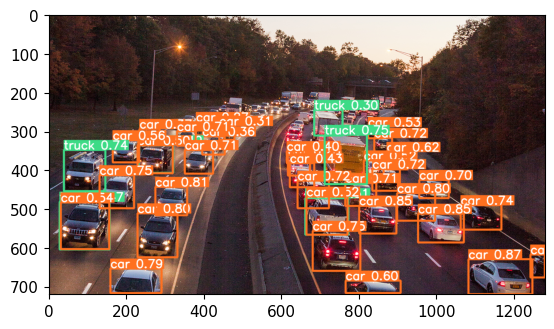

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

Test real time detection

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
  ret, frame = cap.read()

  #make a detection
  results = model(frame)

  cv2.imshow("video capture", np.squeeze(results.render())) #show the results
  
  if cv2.waitKey(25) & 0xFF == 27:
    break
cap.release()
cv2.destroyAllWindows()

Fine tune and train

In [12]:
import uuid
import os
import time

In [14]:
path = os.path.join("data", "images")
labels = ["awake", "drowsy"]
num_imgs = 30

collect training images

In [15]:
cap = cv2.VideoCapture(0)
for label in labels:
  print("collecting images for {}".format(label))
  time.sleep(10)

  #loop through number of images range
  for i in range(num_imgs):
    print("collecting images for {}, number {}".format(label, i+1))
    
    ret, frame = cap.read()

    #initialize image path
    img = os.path.join(path, label+"."+str(uuid.uuid1())+".jpg")
    #print(img)
    #write out image to file
    cv2.imwrite(img, frame)

    #render to screen
    cv2.imshow("image collection", frame)

    #delay between each capture
    time.sleep(2)

    if cv2.waitKey(25) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()

collecting images for awake
collecting images for awake, number 1
collecting images for awake, number 2
collecting images for awake, number 3
collecting images for awake, number 4
collecting images for awake, number 5
collecting images for awake, number 6
collecting images for awake, number 7
collecting images for awake, number 8
collecting images for awake, number 9
collecting images for awake, number 10
collecting images for awake, number 11
collecting images for awake, number 12
collecting images for awake, number 13
collecting images for awake, number 14
collecting images for awake, number 15
collecting images for awake, number 16
collecting images for awake, number 17
collecting images for awake, number 18
collecting images for awake, number 19
collecting images for awake, number 20
collecting images for awake, number 21
collecting images for awake, number 22
collecting images for awake, number 23
collecting images for awake, number 24
collecting images for awake, number 25
collec

In [1]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


manually label images

In [ ]:

#!pip install pyqt5 lxml --upgrade
#!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

fine tune

In [21]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-295-gac6c4383 Python-3.11.7 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_ep

load and test model

In [23]:
model = torch.hub.load("ultralytics/yolov5", "custom", path="yolov5/runs/train/exp5/weights/last.pt", force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\judit/.cache\torch\hub\master.zip
YOLOv5  2024-4-9 Python-3.11.7 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [27]:
#test on img
img = os.path.join("data", "images", "drowsy.ffece1cf-f6b3-11ee-9a0b-40ec992b0e57.jpg")

In [28]:
results=model(img)

In [29]:
results.print()

image 1/1: 512x640 (no detections)
Speed: 18.7ms pre-process, 14.5ms inference, 7.5ms NMS per image at shape (1, 3, 512, 640)


In [30]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('video capture', np.squeeze(results.render()))
    
    if cv2.waitKey(25) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()